<h3>Focusing on drug crime<h3>

In [412]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
seed = 1
np.random.seed(seed)
tf.random.set_seed(seed)

import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers
from tensorflow.keras import callbacks
from tensorflow.keras.layers import Dropout


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

In [413]:
# load dataset
df = pd.read_csv('sixthClean.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1333 entries, 0 to 1332
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1333 non-null   int64  
 1   Type        1333 non-null   object 
 2   Latitude    1333 non-null   float64
 3   Longitude   1333 non-null   float64
 4   Year        1333 non-null   int64  
 5   Month       1333 non-null   int64  
 6   Day         1333 non-null   int64  
 7   Hour        1333 non-null   int64  
 8   Minute      1333 non-null   int64  
 9   Second      1333 non-null   int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 104.3+ KB


,Unnamed: 0,Type,Latitude,Longitude,Year,Month,Day,Hour,Minute,Second
0,3,Person search,51.517431,-0.082458,2019,12,3,9,48,8
1,4,Person search,51.516814,-0.081620,2019,12,4,2,53,26
2,5,Person search,51.513114,-0.086272,2019,12,4,3,15,57
3,6,Person search,51.518060,-0.110683,2019,12,4,6,36,19
4,7,Person search,51.517680,-0.078484,2019,12,4,12,37,18


In [414]:
# encode the Type column by assigning to 0 if it is "Person search" and 1 if it is "Person and Vehicle search"
df['Type'] = df['Type'].map({'Person search': 0, 'Person and Vehicle search': 1})
df.head()
# drop the first column
df = df.drop(df.columns[0], axis=1)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1333 entries, 0 to 1332
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Type       1333 non-null   int64  
 1   Latitude   1333 non-null   float64
 2   Longitude  1333 non-null   float64
 3   Year       1333 non-null   int64  
 4   Month      1333 non-null   int64  
 5   Day        1333 non-null   int64  
 6   Hour       1333 non-null   int64  
 7   Minute     1333 non-null   int64  
 8   Second     1333 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 93.9 KB


,Type,Latitude,Longitude,Year,Month,Day,Hour,Minute,Second
0,0,51.517431,-0.082458,2019,12,3,9,48,8
1,0,51.516814,-0.081620,2019,12,4,2,53,26
2,0,51.513114,-0.086272,2019,12,4,3,15,57
3,0,51.518060,-0.110683,2019,12,4,6,36,19
4,0,51.517680,-0.078484,2019,12,4,12,37,18


In [415]:
# drop out column "Second"
df = df.drop(['Second'], axis=1)

In [416]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1333 entries, 0 to 1332
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Type       1333 non-null   int64  
 1   Latitude   1333 non-null   float64
 2   Longitude  1333 non-null   float64
 3   Year       1333 non-null   int64  
 4   Month      1333 non-null   int64  
 5   Day        1333 non-null   int64  
 6   Hour       1333 non-null   int64  
 7   Minute     1333 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 83.4 KB


,Type,Latitude,Longitude,Year,Month,Day,Hour,Minute
0,0,51.517431,-0.082458,2019,12,3,9,48
1,0,51.516814,-0.081620,2019,12,4,2,53
2,0,51.513114,-0.086272,2019,12,4,3,15
3,0,51.518060,-0.110683,2019,12,4,6,36
4,0,51.517680,-0.078484,2019,12,4,12,37


In [417]:
np.set_printoptions(suppress=True) # avoid scientific notation in numpy array so that it is easier to read and understand

The type of scaler that is best for a crime dataset containing latitude, longitude, and time would depend on the specific needs of the data and the analysis being performed. Generally, the choice of scaler would be based on the range and distribution of values for each of the features in the dataset.

For latitude and longitude data, it might be appropriate to use MinMaxScaler, which scales the values between 0 and 1. This is because latitude and longitude are often expressed in degrees, which typically have a limited range.

For time data, a more appropriate scaler might be the StandardScaler, which scales the values so that they have a mean of 0 and a standard deviation of 1. This is because time data often has a cyclical pattern that can be captured through this type of scaling.

In [418]:
# scale the data
GeoScaler = MinMaxScaler() # scale the latitude and longitude
timeScaler = StandardScaler() # scale the time

In [419]:
# scale latitude and longitude columns with GeoScaler
df['Latitude'] = GeoScaler.fit_transform(df[['Latitude']])
df['Longitude'] = GeoScaler.fit_transform(df[['Longitude']])
df.head()

,Type,Latitude,Longitude,Year,Month,Day,Hour,Minute
0,0,0.159641,0.338325,2019,12,3,9,48
1,0,0.152721,0.344686,2019,12,4,2,53
2,0,0.111227,0.309376,2019,12,4,3,15
3,0,0.166695,0.124092,2019,12,4,6,36
4,0,0.162433,0.368489,2019,12,4,12,37


In [420]:
# scale time columns with timeScaler
df['Year'] = timeScaler.fit_transform(df[['Year']])
df['Month'] = timeScaler.fit_transform(df[['Month']])
df['Day'] = timeScaler.fit_transform(df[['Day']])
df['Hour'] = timeScaler.fit_transform(df[['Hour']])
df['Minute'] = timeScaler.fit_transform(df[['Minute']])
df.head()

,Type,Latitude,Longitude,Year,Month,Day,Hour,Minute
0,0,0.159641,0.338325,-2.117316,1.588349,-1.456502,0.426762,1.095232
1,0,0.152721,0.344686,-2.117316,1.588349,-1.344914,-0.932322,1.386034
2,0,0.111227,0.309376,-2.117316,1.588349,-1.344914,-0.738167,-0.824063
3,0,0.166695,0.124092,-2.117316,1.588349,-1.344914,-0.155703,0.397306
4,0,0.162433,0.368489,-2.117316,1.588349,-1.344914,1.009227,0.455467


In [421]:
# scale type with standard scaler
df['Type'] = timeScaler.fit_transform(df[['Type']])
df.head()

,Type,Latitude,Longitude,Year,Month,Day,Hour,Minute
0,-0.847221,0.159641,0.338325,-2.117316,1.588349,-1.456502,0.426762,1.095232
1,-0.847221,0.152721,0.344686,-2.117316,1.588349,-1.344914,-0.932322,1.386034
2,-0.847221,0.111227,0.309376,-2.117316,1.588349,-1.344914,-0.738167,-0.824063
3,-0.847221,0.166695,0.124092,-2.117316,1.588349,-1.344914,-0.155703,0.397306
4,-0.847221,0.162433,0.368489,-2.117316,1.588349,-1.344914,1.009227,0.455467


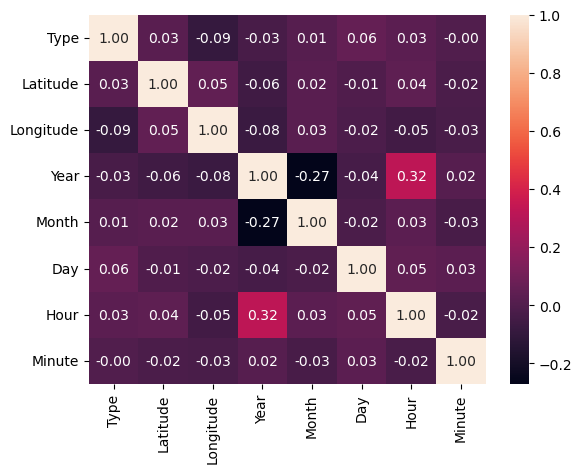

In [422]:
# relation between the Type and the other columns
sns.heatmap(df.corr(), annot=True, fmt='.2f')
plt.show()

The above heatmap shows that the correlation between each of the features is relatively low，meaning that there is little to no linear relationship between them. This is not expected. The correlation between latitude and longitude should be high, as they are both geographic features. In other words, there is not a clear, straightforward relationship between the features in this dataset. This is a good example of why it is important to visualize the data before performing any analysis.

In [423]:
def create_dataset(df, time_steps=1):
    X, y = [], []
    for i in range(len(df) - time_steps):
        v = df.iloc[i:(i + time_steps)]
        X.append(v)
        y.append(df.iloc[i + time_steps])
    return np.array(X), np.array(y)

In [424]:
# call create_dataset function
X,y = create_dataset(df,10)

In [425]:
# print the shape of X and y
print(X.shape)
print(y.shape)
# print the first 1 case of X
print(X[0])

(1323, 10, 8)
(1323, 8)
[[-0.84722105  0.15964068  0.33832515 -2.11731566  1.58834915 -1.45650226
   0.42676214  1.09523169]
 [-0.84722105  0.15272124  0.34468573 -2.11731566  1.58834915 -1.34491438
  -0.93232235  1.38603398]
 [-0.84722105  0.111227    0.30937616 -2.11731566  1.58834915 -1.34491438
  -0.73816742 -0.82406346]
 [-0.84722105  0.1666947   0.12409202 -2.11731566  1.58834915 -1.34491438
  -0.15570264  0.39730618]
 [-0.84722105  0.16243313  0.36848857 -2.11731566  1.58834915 -1.34491438
   1.00922692  0.45546664]
 [-0.84722105  0.15272124  0.34468573 -2.11731566  1.58834915 -1.2333265
  -0.15570264 -0.94038437]
 [ 1.1803295   0.15516603  0.28524695 -2.11731566  1.58834915 -1.01015074
  -0.93232235  0.86258985]
 [ 1.1803295   0.15516603  0.28524695 -2.11731566  1.58834915 -1.01015074
  -0.73816742 -1.52198896]
 [-0.84722105  0.11142886  0.2756909  -2.11731566  1.58834915 -1.01015074
   0.03845229  1.03707123]
 [ 1.1803295   0.13321894  0.37585864 -2.11731566  1.58834915 -0.786

In [426]:
# reshape y to 3 dimensions
y = y.reshape(y.shape[0], 1, y.shape[1]) # sample , 1 time step,  8 features
print(X.shape)
print(y.shape)

(1323, 10, 8)
(1323, 1, 8)


In [427]:
# split the data into train 80%, validation 10% and test 10% sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5)


In [428]:
def build_model():
    model = models.Sequential()
    model.add(layers.LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(layers.LSTM(32, return_sequences=True))
    model.add(layers.LSTM(64))
    model.add(layers.Dense(8))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

# model summary
model = build_model()
model.summary()

# fit model
history = model.fit(X_train, y_train, epochs=100, verbose=1, validation_data=(X_val,y_val),batch_size=512)

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_48 (LSTM)              (None, 10, 64)            18688     
                                                                 
 lstm_49 (LSTM)              (None, 10, 32)            12416     
                                                                 
 lstm_50 (LSTM)              (None, 64)                24832     
                                                                 
 dense_16 (Dense)            (None, 8)                 520       
                                                                 
Total params: 56,456
Trainable params: 56,456
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
3/3 [==============================] - 4s 414ms/step - loss: 0.7491 - mae: 0.6894 - val_loss: 0.7506 - val_mae: 0.6764
Epoch 2/100
3/3 [==============================] -

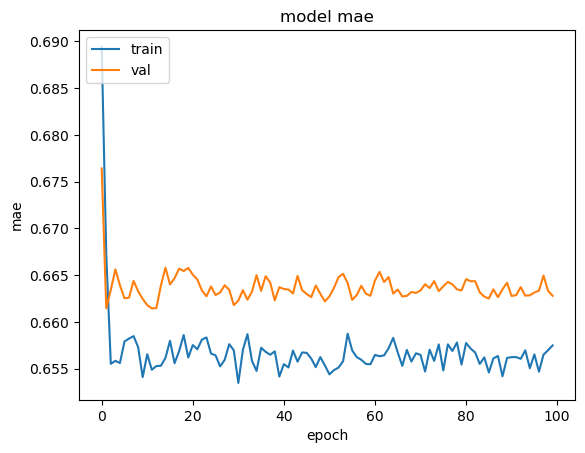

In [429]:
# plot mae
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('model mae')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

The results shown in the above table show that the model is overfitting as validation is always above training. This is because the model is learning the training data too well and is not generalizing well to new data. This is a common problem with neural networks.
To verify thism, we can compare the results with test set and see if the same trend is observed.

In [430]:
y_pred = model.predict(X_test)

# print the shape of y_pred
print(y_pred.shape)

5/5 [==============================] - 1s 11ms/step
(133, 8)


In [431]:
# print the first 1 case of y_pred
print(y_pred[0])
# print the first 1 case of y_test
print(y_test[0])

[-0.02501842  0.13128203  0.30085456  0.00070947  0.01809754  0.01911869
 -0.0074645   0.02380683]
[[-0.84722105  0.11186623  0.37448482  0.19138109  1.29039398 -1.67967802
   0.815072   -0.64958208]]


In [432]:
# reshape y_pred same dimension as y_test
# y_pred = y_pred.reshape(y_pred.shape[0], 1,y_pred.shape[1])


In [433]:
# show both shape
print(y_pred.shape)
print(y_test.shape)

(133, 8)
(133, 1, 8)


In [434]:
b = pd.DataFrame(y_pred)
print(b)

            0         1         2         3         4         5         6  \
0   -0.025018  0.131282  0.300855  0.000709  0.018098  0.019119 -0.007465   
1   -0.019670  0.128491  0.303450  0.002713  0.013939  0.018201 -0.011525   
2   -0.032610  0.128550  0.295091 -0.005876  0.014151  0.013722 -0.009853   
3   -0.031057  0.134031  0.301714 -0.008656  0.021578  0.021852 -0.009145   
4   -0.033856  0.128157  0.292253 -0.012780  0.024382  0.021585 -0.012327   
..        ...       ...       ...       ...       ...       ...       ...   
128 -0.026673  0.123821  0.294690 -0.000417  0.017550  0.016030 -0.012227   
129 -0.024679  0.127273  0.297464 -0.000947  0.018391  0.018406 -0.012965   
130 -0.026594  0.129781  0.303302  0.002101  0.012805  0.013071 -0.008181   
131 -0.022986  0.128611  0.293324  0.008037  0.008614  0.012422 -0.004677   
132 -0.020224  0.132565  0.302617  0.009546  0.006374  0.016119 -0.007842   

            7  
0    0.023807  
1    0.030124  
2    0.039716  
3    0.0317

In [435]:
# inverse scale the pd.DataFrame b
def inverse_scale(pd):
    pd[0] = timeScaler.inverse_transform(pd[[0]])
    pd[1] = GeoScaler.inverse_transform(pd[[1]])
    pd[2] = GeoScaler.inverse_transform(pd[[2]])
    pd[3] = timeScaler.inverse_transform(pd[[3]])
    pd[4] = timeScaler.inverse_transform(pd[[4]])
    pd[5] = timeScaler.inverse_transform(pd[[5]])
    pd[6] = timeScaler.inverse_transform(pd[[6]])
    pd[7] = timeScaler.inverse_transform(pd[[7]])
    return pd

In [436]:
b = inverse_scale(b)

In [437]:
# print the inverse scaled pd.DataFrame b
print(b)

            0         1         2         3         4         5         6  \
0    0.405515 -0.109736 -0.087395  0.418204  0.426780  0.427284  0.414173   
1    0.408153 -0.110104 -0.087053  0.419193  0.424729  0.426831  0.412170   
2    0.401771 -0.110096 -0.088154  0.414956  0.424834  0.424622  0.412995   
3    0.402537 -0.109374 -0.087281  0.413585  0.428497  0.428632  0.413344   
4    0.401156 -0.110147 -0.088528  0.411551  0.429880  0.428500  0.411775   
..        ...       ...       ...       ...       ...       ...       ...   
128  0.404699 -0.110719 -0.088207  0.417649  0.426510  0.425761  0.411824   
129  0.405683 -0.110264 -0.087841  0.417387  0.426925  0.426932  0.411460   
130  0.404738 -0.109933 -0.087072  0.418890  0.424170  0.424301  0.413820   
131  0.406518 -0.110088 -0.088387  0.421818  0.422103  0.423981  0.415548   
132  0.407880 -0.109567 -0.087163  0.422563  0.420998  0.425804  0.413987   

            7  
0    0.429596  
1    0.432712  
2    0.437442  
3    0.4335